## 1. 基本模型

In [1]:
using Plots

In [2]:
g1(k) = k
function g2(k, )
    δ=0.2
    σ=0.3
    n=0.08
    θ=0.36
    return ((1-δ)*k + σ*1*k^θ) / (1+n)
end

g2 (generic function with 1 method)

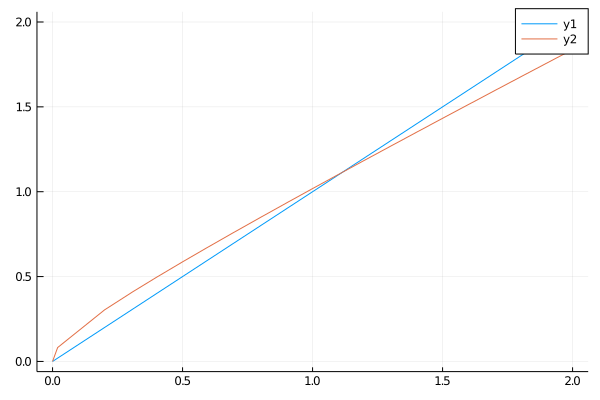

In [3]:
plot([g1, g2], 0, 2)

In [4]:
savefig("Solow_01.png")

## 2. 随机Solow模型

In [20]:
function Sto_Solow(k0, num=150)
    A = 1
    n = 0.02
    δ = 0.1
    θ = 0.36
    σ = 0.2
    sig_e = 0.2
    k = rand(num+1)
    k[1] = k0
    for t in 1:num
        k[t+1] = ((1-δ)*k[t] + σ*A*(k[t]^θ) * exp(sig_e*randn()))/(1+n)
    end
    return k
end

Sto_Solow (generic function with 2 methods)

In [23]:
k1 = Sto_Solow(2.0)
k2 = Sto_Solow(2.0)
k3 = Sto_Solow(2.0)
x = 0:150
plot(x, [k1, k2, k3])
savefig("Solow_02.png")

## 3. 对数线性化

In [45]:
function Sto_Solow2(k0, num=150)
    A = 1
    n = 0.02
    δ = 0.1
    θ = 0.36
    σ = 0.2
    sig_e = 0.2
    k_bar = (σ*A/(δ+n))^(1/(1-θ))
    B = (1+θ*n - δ*(1-θ))/(1+n)
    C = (δ+n)/(1+n)
    k1 = rand(num+1)
    k2 = rand(num+1)
    k3 = rand(num+1)
    k1[1] = k0
    k2[1] = log(k0) - log(k_bar)
    k3[1] = k0
    for t in 1:num
        ε = sig_e*randn()
        k1[t+1] = ((1-δ)*k1[t] + σ*A*(k1[t]^θ) * exp(ε))/(1+n)
        k2[t+1] = B * k2[t] + C * ε
        k3[t+1] = k_bar * exp(k2[t+1])
    end
    return k1, k2, k3
end

Sto_Solow2 (generic function with 2 methods)

In [48]:
k1, k2, k3 = Sto_Solow2(2.5)
x = 0:150
plot(x, [k1, k3])
savefig("Solow_03.png")